In [1]:
import sys
sys.path.append('../src/')
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import registration as reg
import segmentation as seg
import analysis as ana
import SimpleITK as sitk
import numpy as np
import utils as ut
import importlib

In [51]:
MASK_PATH = "../data/atlas-seg/Atlas_segmentations/{0}_atlas_seg.nii"
BMASK_PATH = "../data/atlas-seg/{0}_atlas_seg.nii"
IMG_PATH = "../data/resampled_images_256/{0}_image.nii"
indices = [40,41,42]
alpha=0.7

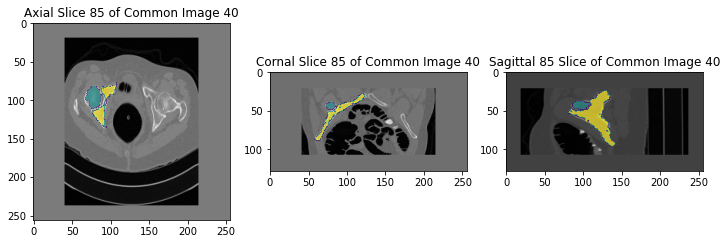

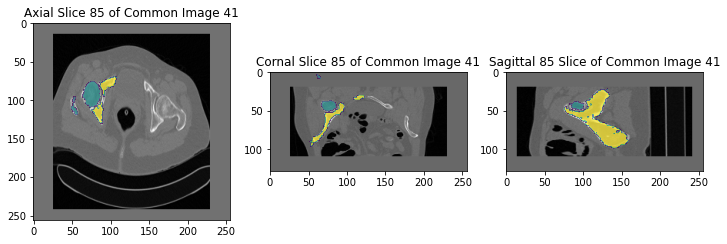

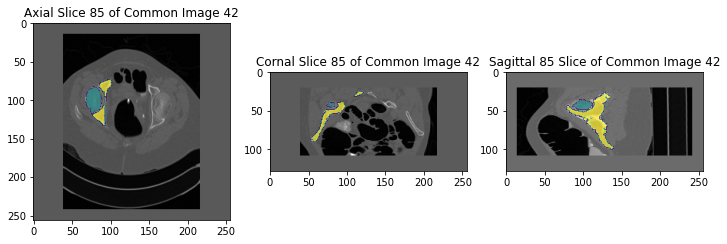

In [63]:
cmap=pl.cm.viridis
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = 0.9999
my_cmap[0, -1] = 0.0001
my_cmap = ListedColormap(my_cmap)

for id in indices:
    img = sitk.ReadImage(IMG_PATH.format(id))
    mask = sitk.ReadImage(MASK_PATH.format(id))

    img_data = sitk.GetArrayFromImage(img)
    mask_data = sitk.GetArrayFromImage(mask)
    imageSize = img_data.shape

    plt.figure(figsize=(12, 10))
    plt.subplot(131)
    plt.imshow(img_data[int(imageSize[0]/3), :, :], cmap="gray")
    plt.imshow(mask_data[int(imageSize[0]/3), :, :],
               cmap=my_cmap, alpha=alpha)
    plt.title(f'Axial Slice {imageSize[2]//3} of Common Image {id}')

    plt.subplot(132)
    plt.imshow(img_data[:, int(imageSize[1]/3), :], cmap="gray")
    plt.imshow(mask_data[:, int(imageSize[1]/3), :],
               cmap=my_cmap, alpha=alpha)
    plt.title(f'Cornal Slice {imageSize[2]//3} of Common Image {id}')

    plt.subplot(133)
    plt.imshow(img_data[:, :, int(imageSize[2]/3)], cmap="gray")
    plt.imshow(mask_data[:, :, int(imageSize[2]/3)],
               cmap=my_cmap, alpha=alpha)
    plt.title(f'Sagittal {imageSize[2]//3} Slice of Common Image {id}')
    plt.savefig(f'../../images_report/right_{id}.png', bbox_inches='tight')
    plt.show()

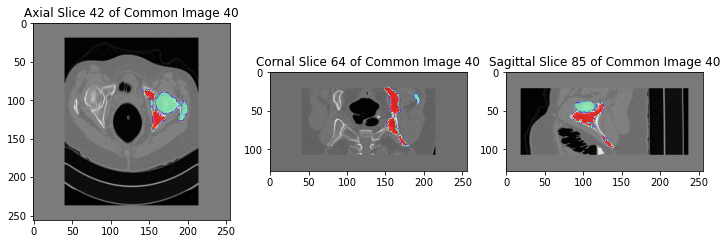

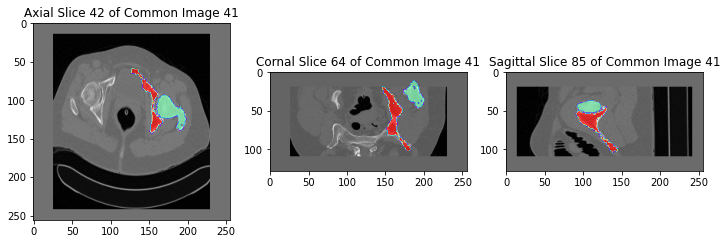

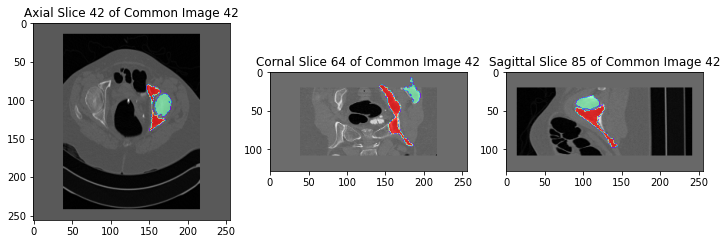

In [65]:
cmap=pl.cm.rainbow
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = 0.9999
my_cmap[0, -1] = 0.0001
my_cmap = ListedColormap(my_cmap)

for id in indices:
    img = sitk.ReadImage(IMG_PATH.format(id))
    mask = sitk.ReadImage(BMASK_PATH.format(id))

    img_data = sitk.GetArrayFromImage(img)
    mask_data = sitk.GetArrayFromImage(mask)
    imageSize = img_data.shape

    plt.figure(figsize=(12, 10))
    plt.subplot(131)
    plt.imshow(img_data[int(imageSize[0]/3), :, :], cmap="gray")
    plt.imshow(mask_data[int(imageSize[0]/3), :, :],
               cmap=my_cmap, alpha=alpha)
    plt.title(f'Axial Slice {imageSize[0]//3} of Common Image {id}')

    plt.subplot(132)
    plt.imshow(img_data[:, int(imageSize[1]/2), :], cmap="gray")
    plt.imshow(mask_data[:, int(imageSize[1]/2), :],
               cmap=my_cmap, alpha=alpha)
    plt.title(f'Cornal Slice {imageSize[0]//2} of Common Image {id}')

    plt.subplot(133)
    plt.imshow(img_data[:, :, 2*int(imageSize[2]/3)], cmap="gray")
    plt.imshow(mask_data[:, :, 2*int(imageSize[2]/3)],
               cmap=my_cmap, alpha=alpha)
    plt.title(f'Sagittal Slice {2*imageSize[0]//3} of Common Image {id}')
    plt.savefig(f'../../images_report/left_{id}.png', bbox_inches='tight')
    plt.show()